# Question (e)

In [124]:
!pip install matplotlib

     ---------------------------------------- 7.2/7.2 MB 8.5 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 14.4 MB/s eta 0:00:00
     ---------------------------------------- 98.3/98.3 kB 5.5 MB/s eta 0:00:00
     ---------------------------------------- 55.3/55.3 kB 2.8 MB/s eta 0:00:00
     ------------------------------------- 965.4/965.4 kB 12.2 MB/s eta 0:00:00
     -------------------------------------- 163.0/163.0 kB 9.5 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: C:\Users\Keter\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [125]:
import numpy as np
import random
from tqdm import trange
import itertools
import matplotlib.pyplot as plt

In [2]:
H = np.array([
    [1, 0, 0, 0, 1, 1, 1, 0],
    [0, 1, 1, 0, 0, 1, 1, 0],
    [1, 0, 1, 0, 0, 1, 1, 1],
    [1, 0, 1, 1, 0, 1, 0, 0],
])

In [43]:
x = np.array([1, 1, 1, 0, 1, 0, 0, 0]).reshape((-1, 1))
# Validate that codeword x belongs to N(H)
H.dot(x) % 2

array([[0],
       [0],
       [0],
       [0]], dtype=int32)

In [23]:
n = 8
k = 4
p = 0.2
N = 1000

In [22]:
def e_generator(p, n):
    e = np.random.rand(n, 1)
    for i in range(e.shape[0]):
        if (e[i][0] <= p):
            e[i][0] = 1
        else:
            e[i][0] = 0
    return e

In [130]:
# Prepare e, y, and s for 1000 times
def prepare_data(x, p, n):
    e_lists = []
    for i in range(N):
        e_lists.append(e_generator(p, n))
    y_lists = []
    for i in range(N):
        y_lists.append((x + e_lists[i]) % 2)
    s_lists = []
    for i in range(N):
        s_lists.append(H.dot(y_lists[i]) % 2)
    
    return e_lists, y_lists, s_lists

In [106]:
F = [0, 1]
E = np.array(list(itertools.product(*([F] * n)))).transpose()
norms = [int(np.linalg.norm(e, 1)) for e in E.transpose()]
products = H.dot(E) % 2

# Maximum Likelihood algorithm
def ML(s):
    """
        Given s, find out the e with minimum norm(e) s.t. He=s
    """
    min_norm = N + 1
    e = None
    for i in range(products.shape[1]):
        if np.array_equal(products[:,i].reshape(-1, 1), s):
            norm = norms[i]
            if norm < min_norm:
                min_norm = norm
                e = E[:,i]
    return e
    


In [133]:
def main(x, p):
    e_lists, y_lists, s_lists = prepare_data(x, p, n)
    right_cnt = 0
    for i in range(N):
        e = ML(s_lists[i]).reshape(-1, 1)
        if np.array_equal(e, e_lists[i]):
            right_cnt += 1
            
    ratio = right_cnt / N
    return ratio

In [ ]:
p = np.linspace(0, 1/2, 100)
ratio = []
for i in trange(len(p)):
    ratio.append(main(x, p[i]))

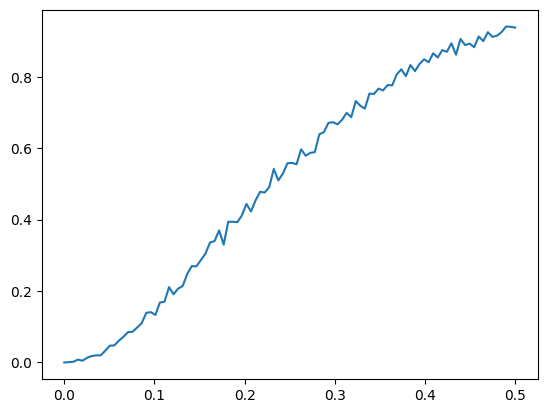

In [129]:
plt.plot(p, 1 - np.array(ratio))
plt.savefig("error_rate_p.png")

In [ ]:
ratio_list = []
codeword_list = []
for i in range(products.shape[1]):
    if (np.linalg.norm(products[:,i], 1) == 0):
        x = E[:,i].reshape(-1, 1)
        print(x)
        p = np.linspace(0, 1/2, 100)
        ratio = []
        for i in trange(len(p)):
            ratio.append(main(x, p[i]))
        ratio_list.append(ratio)
        codeword_list.append(x)

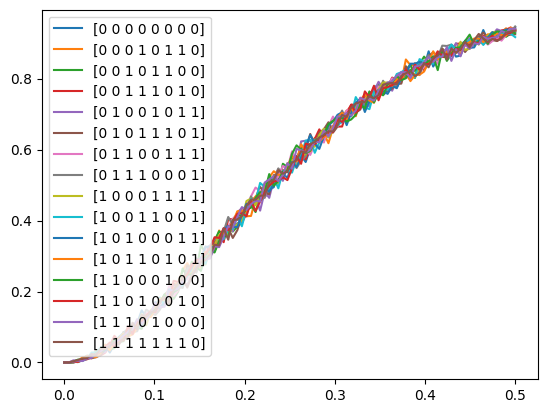

In [151]:
for i in range(len(codeword_list)):
    plt.plot(p, 1 - np.array(ratio_list[i]), label=str(codeword_list[i].reshape(1, -1)[0]))
plt.legend(loc="best")
plt.savefig("all_codewords.png")